In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
import sys
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from glob import glob
import os
import pandas as pd
% matplotlib inline

In [2]:
file_list = glob('20*.txt')
type(file_list)

list

In [3]:
t = []
for file in file_list:
    with open(file ,'r', encoding = 'utf-8') as f:
        ttolines = []
        for line in f:
            ttolines.append(line)
    t.append(ttolines)

In [4]:
def text_cut(d, dic_vector):
    for article in d:
        seg_list = jieba.cut(article) 
        string_list = "|".join(seg_list).split('|')
        for s in string_list:
            if not (s in dic_vector.keys()):
                dic_vector[s] = 1
            else:
                dic_vector[s] += 1
    return dic_vector

In [5]:
div_vector = {}
div_vector = text_cut(t[0],div_vector)
df = pd.DataFrame(div_vector,index = [0])
#把每一篇文章中的句子切成詞組並存進DataFrame裡
for i in range(1,len(t)):
    div_vector = {}
    div_vector = text_cut(t[i],div_vector)
    temp_df = pd.DataFrame(div_vector,index=[0])
    #把不同篇文章的詞組以columns連接起來
    df = pd.concat([df,temp_df],ignore_index=True)
#把缺失值用0替代
df = df.fillna(0)
df

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\LYDIA\AppData\Local\Temp\jieba.cache
Loading model cost 2.181 seconds.
Prefix dict has been built succesfully.
C:\Users\LYDIA\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


,,,"""",$,%,(,),",",-,.,...,﻿,％,（,）,，,－,／,：,；,？
0,1453,938,4.0,0.0,24,218,217,123,367.0,151,...,1,5.0,72.0,73.0,389,0.0,1.0,72.0,16.0,43.0
1,14,18,0.0,4.0,1,3,3,22,0.0,3,...,1,0.0,0.0,0.0,3,0.0,0.0,0.0,0.0,0.0
2,376,1881,0.0,52.0,17,135,132,270,76.0,37,...,1,0.0,0.0,0.0,316,2.0,0.0,22.0,4.0,0.0
3,1582,1013,4.0,0.0,17,217,216,56,282.0,208,...,1,5.0,62.0,63.0,421,0.0,1.0,104.0,13.0,44.0
4,8,10,0.0,4.0,1,1,1,22,0.0,2,...,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0
5,300,1757,0.0,54.0,17,151,151,292,70.0,40,...,1,0.0,0.0,0.0,309,2.0,0.0,24.0,14.0,0.0


In [6]:
df_drop = df.drop(df.columns.tolist()[0:2294]+df.columns.tolist()[10392:10405],axis=1)
df_drop

,技術士,投,投信,投入,投資,投資事,投資事業,投資人,投資人關,投資及,...,﻿,％,（,）,，,－,／,：,；,？
0,1.0,1.0,1.0,1.0,26.0,1.0,1.0,3.0,2.0,0.0,...,1,5.0,72.0,73.0,389,0.0,1.0,72.0,16.0,43.0
1,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1,0.0,0.0,0.0,3,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1,0.0,0.0,0.0,316,2.0,0.0,22.0,4.0,0.0
3,1.0,0.0,1.0,1.0,23.0,1.0,1.0,3.0,2.0,0.0,...,1,5.0,62.0,63.0,421,0.0,1.0,104.0,13.0,44.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,...,1,0.0,0.0,0.0,309,2.0,0.0,24.0,14.0,0.0


In [7]:
#對標點符號以外詞組做TF-IDF
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(df_drop.values)  
df_tfidf = pd.DataFrame(tfidf.toarray(), columns = df_drop.columns.tolist())
#把TF-IDF後的詞組中頻率過低的詞組刪除
df_tfidf[df_tfidf>0.01].dropna(axis=1)

,民國,為,，
0,0.016485,0.048187,0.493287
1,0.074452,0.148903,0.223355
2,0.069617,0.130308,0.564074
3,0.032481,0.040060,0.455822
4,0.173432,0.173432,0.173432
5,0.115126,0.115126,0.613345


C:\Users\LYDIA\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


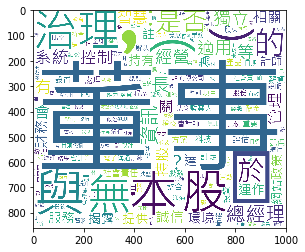

In [8]:
#再觀察一次文字雲並手動刪除不適合的資訊
from wordcloud import WordCloud
import matplotlib.pyplot as plt
tfidf_dict = df_tfidf.to_dict(orient='records')
wordcloud = WordCloud(font_path = 'msjh.ttc', background_color="white",width=1000, height=860, margin=2)
wordcloud.fit_words(tfidf_dict[0])
plt.imshow(wordcloud)
plt.show()

In [9]:
remove_list = ['的','，','年','為','大同','在','與','於','股東','更','年度','已','是否','(',')','關','相關','（','）','有','無','?','等','適用','提供','？','本','股','\uf0fc','千元','$','每','到期日','予','十二月','附','○','日至民國','日起','幣','為民國','106.12','共分','餘額','每期','續','減','三十一日','按','期','日','自民國','民國','期間','間','期至','第','者','除','計','新','：','註','達','月','；','至小數點','第二位']
for item in remove_list:
    tfidf_dict[0].pop(item, None)

C:\Users\LYDIA\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


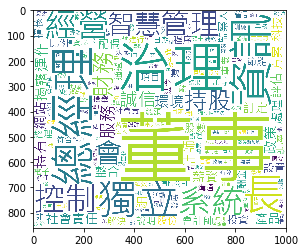

In [10]:
remove_list = ['的','，','年','為','大同','在','與','於','股東','更','年度','已','是否','(',')','關','相關','（','）','有','無','?','等','適用','提供','？','本','股','\uf0fc','千元','$','每','到期日','予','十二月','附','○','日至民國','日起','幣','為民國','106.12','共分','餘額','每期','續','減','三十一日','按','期','日','自民國','民國','期間','間','期至','第','者','除','計','新','：','註','達''月','；','至小數點','第二位']
for item in remove_list:
    tfidf_dict[0].pop(item, None)
wordcloud = WordCloud(font_path = 'msjh.ttc', background_color="white",width=1000, height=860, margin=2)
wordcloud.fit_words(tfidf_dict[0])
plt.imshow(wordcloud)
plt.show()

C:\Users\LYDIA\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


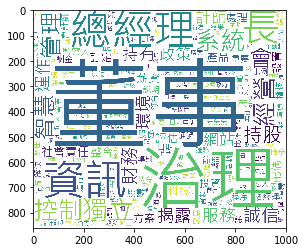

In [11]:
#結果圖呈現
remove_list = ['的','，','年','為','大同','在','與','於','股東','更','年度','已','是否','(',')','關','相關','（','）','有','無','?','等','適用','提供','？','本','股','\uf0fc','千元','$','每','到期日','予','十二月','附','○','日至民國','日起','幣','為民國','106.12','共分','餘額','每期','續','減','三十一日','按','期','日','自民國','民國','期間','間','期至','第','者','除','計','新','：','註','達''月','；','至小數點','第二位']
remove_list = remove_list +['資產','、','有限公司','對','','','','','','','','','']
for item in remove_list:
    tfidf_dict[0].pop(item, None)
wordcloud = WordCloud(font_path = 'msjh.ttc', background_color="white",width=1000, height=860, margin=2)
wordcloud.fit_words(tfidf_dict[0])
plt.imshow(wordcloud)
plt.show()